# Pattern-to-function analysis of Cloud Botany  
Working with a downloaded 256x256 2D LWP subset, every 6th gridpoint or pixel, every 10th time (200 minutes apart), all grabbed/saved by another notebook in this folder. Also use profile data, also grabbed in the downloads notebook. 


[Defining functions for pattern characterization](#Functions)

[Pattern measures performed](#Pattern_measures)

[2D information H/Smax & predictors & impacts](#H_predictors_impacts)

[A horiz-mean dataset of all that, ds_patterns](#ds_patterns)

[Pattern plots (103 page PDF foa all sims)](#PatternPlots)

[Analysis: pathways to greater H, and impacts of it](#Pathways)

#### Not used in this shallow convection notebook 
[Composite map of an array around all nonzero values](#Composite_prob)

[Fits in r and theta of the above](#CompProbFits)


In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np # https://github.com/numpy/numpy/issues/23775
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<h2 id="PatternPlots">Plots and analysis of pattern H & predictors & impacts</h2>


In [5]:
# GRAB modest sized ds_patterns dataset for analysis without having to recompute 
ds_pattern = xr.open_dataset('~/GitHub/EvolutionaryConvection/Shallow_patterns_CloudBotany/'+\
                              'CloudBotany_patterns_predictors.nc')

#'/~/GitHub/EvolutionaryConvection/Shallow_patterns_CloudBotany/CloudBotany_patterns_predictors.nc'

------------- 
# First draft plots, highly labeled 

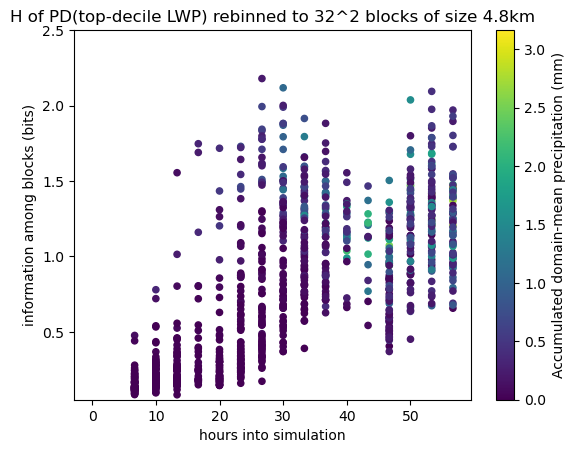

In [341]:
# Octave 3 is nice enough for seeing mesoscale (>4.8km) information growth
oc = 3
boxsize = 0.6 *octaves[oc]   # km, boxsize as we have taken every 6th 100m gridcell

# Scatterplot requires a meshgrid trick, a time coordinate for each simulation
plt.scatter( np.meshgrid(tt,ds_profiles.member)[0], Hs[:,:,oc], \
            c=ds_profiles.IP.sel(time = ds_2D.time), s=20)

plt.ylim([0.05,2.5])
plt.title('H of PD(top-decile LWP) rebinned to '+str(int(256/octaves[oc]))+ \
          '^2 blocks of size '+str((boxsize))+'km');
plt.ylabel('information among blocks (bits)') ;
plt.xlabel('hours into simulation');
cbar = plt.colorbar()
cbar.set_label('Accumulated domain-mean precipitation (mm)')

# annotate with simulation numbers for points? no 
#for i, txt in enumerate(results.index):
#    plt.annotate(txt+1, (results.wT1[i],results.altitude[i]))


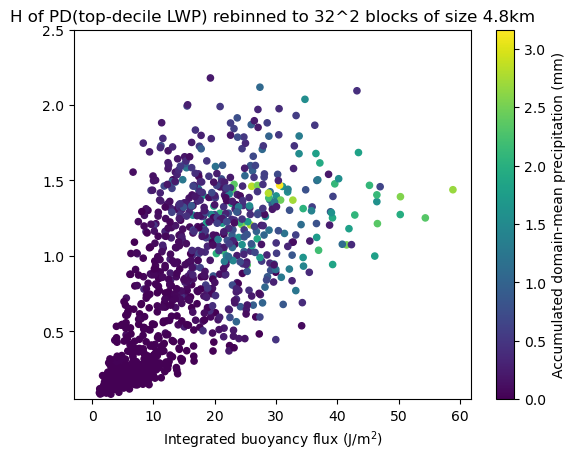

In [340]:
plt.scatter( ds_profiles.IBF.sel(time = ds_2D.time), Hs[:,:,3], \
            c=ds_profiles.IP.sel(time = ds_2D.time), \
            s=20)
plt.ylim([0.05,2.5])
plt.title('H of PD(top-decile LWP) rebinned to '+str(int(256/octaves[oc]))+ \
          '^2 blocks of size '+str((boxsize))+'km');

#plt.ylabel('pattern information among 32x32 blocks (bits)')
plt.xlabel('Integrated buoyancy flux (J/m$^2$)');
cbar = plt.colorbar()
cbar.set_label('Accumulated domain-mean precipitation (mm)')

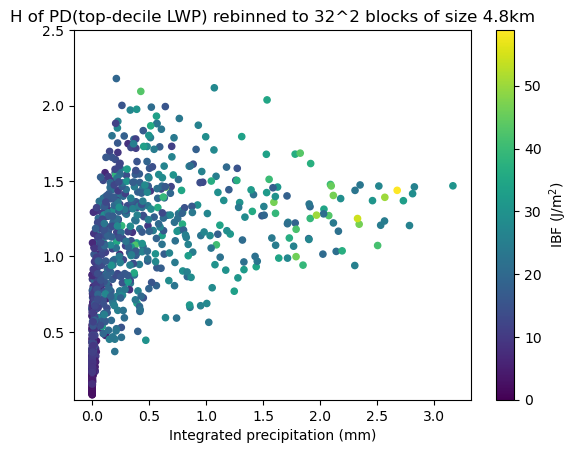

In [342]:
plt.scatter( ds_profiles.IP.sel(time = ds_2D.time), Hs[:,:,3], \
            c=ds_profiles.IBF.sel(time = ds_2D.time), \
            s=20)
plt.ylim([0.05,2.5])
plt.title('H of PD(top-decile LWP) rebinned to '+str(int(256/octaves[oc]))+ \
          '^2 blocks of size '+str((boxsize))+'km');

#plt.ylabel('pattern information among 32x32 blocks (bits)')
plt.xlabel('Integrated precipitation (mm)');
cbar = plt.colorbar()
cbar.set_label('IBF (J/m$^2$)')

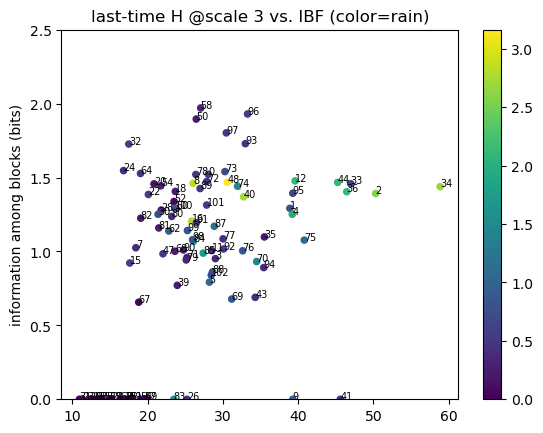

In [441]:
# Plot H at final time level
# annotate with experiment number, for choosing case studies 

# Apparently precip is correlated with large IBF cases, makes sense perhaps 

plt.scatter( ds_profiles.IBF.sel(time = ds_2D.time)[:,-1], Hs[:,-1,3], \
            c=ds_profiles.IP.sel(time = ds_2D.time)[:,-1], s=20) 

xxx = ds_profiles.IBF.sel(time = ds_2D.time)[:,-1]
yyy = Hs[:,-1,3]
m=np.array( range(103) ).astype(str)

for iii in range(103):
    plt.annotate(m[iii], [xxx[iii],yyy[iii]], size=7)

plt.ylim([0,2.5])
plt.colorbar()
plt.title('last-time H @scale 3 vs. IBF (color=rain)');
plt.ylabel('information among blocks (bits)') ;
plt.ylabel('information among blocks (bits)') ;

# interrogate parameters of selected cases from above
# df_parameters.iloc[ [2,9,32,33,34,35,36] ]  # dataset from other CloudBotany notebook on server

----------- 
<h2 id="Composite_prob">Composite of probability around all nonzero values</h2>


In [ ]:
        # test for a given imem, it 
        it=3
        imem=83
        sq = ds_2D.lwp[imem][it]
        
# create 'active' and 'p_active' arrays: 1 for top 10% of LWP, all others 0
        decile9 = np.sort( np.ravel( sq.values) )[9*sq.size//10]   # 9/10 decile 
        active = (sq > decile9)
        p_active = active/np.sum(active) # probability, because it sums to 1

        comp = composite_around_nonzeros_periodic(p_active)

In [108]:
# THE BIG LOOP over ensemble members (simulations)
#for mem in range( ds_2D.member.size ):
#    print('simulation ',mem)
#   for it in range(2,18):   # times 200 minutes apart, not the first two 
# as in cell above but not needed  

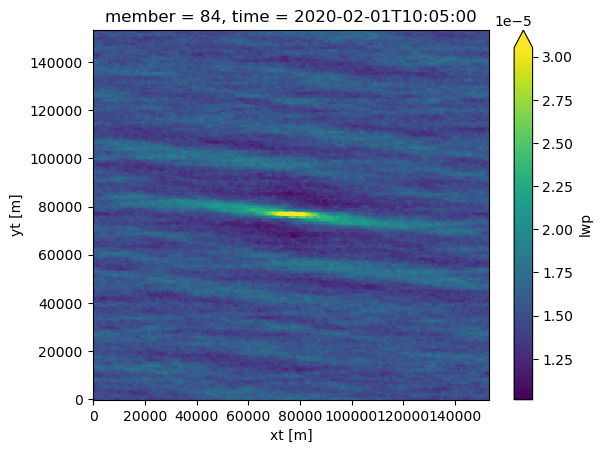

In [102]:
        comp.plot( vmax = 2./256./256. )  # max value is always 10/256./256. at the center 

<h2 id="CompProbFits">Claude.ai fits of composite p(r), p(theta)</h2>

In [ ]:
from scipy.optimize import curve_fit

def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

def fourier_series(x, *a):
    ret = a[0]
    for deg in range(1, len(a)):
        ret += a[deg] * np.cos(deg * x)
    return ret

def fit_polar_curves(data_array, min_radius=0, max_radius=50, poly_degree=6, fourier_terms=6):
    center = np.array(data_array.shape) // 2
    y, x = np.ogrid[-center[0]:center[0], -center[1]:center[1]]
    r, theta = cartesian_to_polar(x, y)
    
    mask = (r >= min_radius) & (r <= max_radius)
    
    r_bins = np.arange(min_radius, max_radius + 1)
    hist, bin_edges = np.histogram(r, bins=r_bins, weights=data_array.values)
    bin_areas = np.pi * (bin_edges[1:]**2 - bin_edges[:-1]**2)
    p_r = hist / bin_areas
    p_r /= p_r.sum()
    
    r_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    p_r_coeffs = np.polyfit(r_centers, p_r, poly_degree)
    p_r_fit = np.poly1d(p_r_coeffs)(r_centers)
    p_r_fit = np.maximum(p_r_fit, 0)
    p_r_fit /= p_r_fit.sum()
    
    theta_bins = np.linspace(-np.pi, np.pi, 60)
    p_theta, _ = np.histogram(theta[mask], bins=theta_bins, weights=data_array.values[mask])
    p_theta /= p_theta.sum()
    
    theta_centers = (theta_bins[:-1] + theta_bins[1:]) / 2
    initial_guess = [1.0] + [0.1] * (fourier_terms - 1)
    popt, _ = curve_fit(fourier_series, theta_centers, p_theta, p0=initial_guess)
    p_theta_fit = fourier_series(theta_centers, *popt)
    p_theta_fit = np.maximum(p_theta_fit, 0)
    p_theta_fit /= p_theta_fit.sum()
    
    p_r_xr = xr.DataArray(p_r_fit, coords=[('r', r_centers)], name='p(r)')
    p_theta_xr = xr.DataArray(p_theta_fit, coords=[('theta', theta_centers)], name='p(theta)')
    
    return p_r_xr, p_theta_xr, p_r, p_theta

def fit_and_plot_polar_curves(data_array, min_radius=10, max_radius=50, poly_degree=6, fourier_terms=12):
    p_r_fit, p_theta_fit, p_r_hist, p_theta_hist = fit_polar_curves(data_array, min_radius, max_radius, poly_degree, fourier_terms)
    
    r_centers = p_r_fit.r.values
    theta_centers = p_theta_fit.theta.values
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    ax1.step(r_centers, p_r_hist, where='mid', label='Histogram', alpha=0.7)
    p_r_fit.plot(ax=ax1, label='Fitted Curve')
    ax1.set_title('p(r)')
    ax1.set_xlabel('r')
    ax1.set_xlim(min_radius, max_radius)
    ax1.legend()
    
    ax2.step(theta_centers, p_theta_hist, where='mid', label='Histogram', alpha=0.7)
    p_theta_fit.plot(ax=ax2, label='Fitted Curve')
    ax2.set_title('p(θ)')
    ax2.set_xlabel('θ')
    ax2.set_xlim(-np.pi, np.pi)
    ax2.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
    ax2.set_xticklabels(['-π', '-π/2', '0', 'π/2', 'π'])
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    return p_r_fit, p_theta_fit

# Assuming your original data is in an xarray DataArray called 'data'
p_r, p_theta = fit_and_plot_polar_curves(comp, min_radius=0, max_radius=50, \
                                         poly_degree=6, fourier_terms=12)

In [ ]:
from scipy.optimize import curve_fit

def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

def fourier_series(x, *a):
    ret = a[0]
    for deg in range(1, len(a)):
        ret += a[deg] * np.cos(deg * x)
    return ret

def fit_polar_curves(data_array, min_radius=0, max_radius=50, poly_degree=6, fourier_terms=6):
    center = np.array(data_array.shape) // 2
    y, x = np.ogrid[-center[0]:center[0], -center[1]:center[1]]
    r, theta = cartesian_to_polar(x, y)
    
    mask = (r >= min_radius) & (r <= max_radius)
    
    r_bins = np.arange(min_radius, max_radius + 1)
    hist, bin_edges = np.histogram(r, bins=r_bins, weights=data_array.values)
    bin_areas = np.pi * (bin_edges[1:]**2 - bin_edges[:-1]**2)
    p_r = hist / bin_areas
    p_r /= p_r.sum()
    
    r_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    p_r_coeffs = np.polyfit(r_centers, p_r, poly_degree)
    p_r_fit = np.poly1d(p_r_coeffs)(r_centers)
    p_r_fit = np.maximum(p_r_fit, 0)
    p_r_fit /= p_r_fit.sum()
    
    theta_bins = np.linspace(-np.pi, np.pi, 60)
    p_theta, _ = np.histogram(theta[mask], bins=theta_bins, weights=data_array.values[mask])
    p_theta /= p_theta.sum()
    
    theta_centers = (theta_bins[:-1] + theta_bins[1:]) / 2
    initial_guess = [1.0] + [0.1] * (fourier_terms - 1)
    popt, _ = curve_fit(fourier_series, theta_centers, p_theta, p0=initial_guess)
    p_theta_fit = fourier_series(theta_centers, *popt)
    p_theta_fit = np.maximum(p_theta_fit, 0)
    p_theta_fit /= p_theta_fit.sum()
    
    p_r_xr = xr.DataArray(p_r_fit, coords=[('r', r_centers)], name='p(r)')
    p_theta_xr = xr.DataArray(p_theta_fit, coords=[('theta', theta_centers)], name='p(theta)')
    
    return p_r_xr, p_theta_xr, p_r, p_theta

def fit_and_plot_polar_curves(data_array, min_radius=10, max_radius=50, poly_degree=6, fourier_terms=12):
    p_r_fit, p_theta_fit, p_r_hist, p_theta_hist = fit_polar_curves(data_array, min_radius, max_radius, poly_degree, fourier_terms)
    
    r_centers = p_r_fit.r.values
    theta_centers = p_theta_fit.theta.values
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    ax1.step(r_centers, p_r_hist, where='mid', label='Histogram', alpha=0.7)
    p_r_fit.plot(ax=ax1, label='Fitted Curve')
    ax1.set_title('p(r)')
    ax1.set_xlabel('r')
    ax1.set_xlim(min_radius, max_radius)
    ax1.legend()
    
    ax2.step(theta_centers, p_theta_hist, where='mid', label='Histogram', alpha=0.7)
    p_theta_fit.plot(ax=ax2, label='Fitted Curve')
    ax2.set_title('p(θ)')
    ax2.set_xlabel('θ')
    ax2.set_xlim(-np.pi, np.pi)
    ax2.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
    ax2.set_xticklabels(['-π', '-π/2', '0', 'π/2', 'π'])
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    return p_r_fit, p_theta_fit

# Assuming your original data is in an xarray DataArray called 'data'
p_r, p_theta = fit_and_plot_polar_curves(comp, min_radius=0, max_radius=50, \
                                         poly_degree=6, fourier_terms=12)